Plot infection evolution (given .traj file)

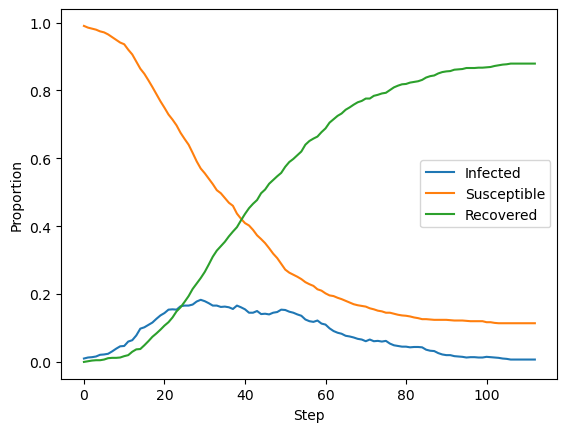

In [1]:
import matplotlib.pyplot as plt
from get_group_fracs import get_group_fracs
import numpy as np

# Specify the file name containing the trajectory data
file_name = "postvis_recovery.traj"


group_fracs, times = get_group_fracs(file_name)

# Plot the infected, susceptible, and recovered fractions over time
plt.plot(group_fracs[:, 0], label="Infected")
plt.plot(group_fracs[:, 1], label="Susceptible")
plt.plot(group_fracs[:, 2], label="Recovered")


plt.xlabel("Step")  
plt.ylabel("Proportion")  
plt.legend()  
plt.show()


Plot difference between infection rates (given .traj files)

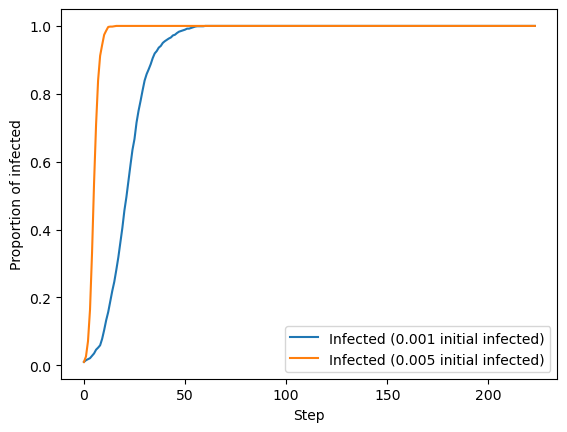

In [4]:
import matplotlib.pyplot as plt
from get_group_fracs import get_group_fracs

# File names for the two simulations
file_name1 = "postvis2.traj"
file_name2 = "postvis1.traj"


group_fracs1, _ = get_group_fracs(file_name1)
group_fracs2, _ = get_group_fracs(file_name2)

# Plot the infected proportions for each simulation
plt.plot(group_fracs1[:, 0], label="Infected (0.001 initial infected)")
plt.plot(group_fracs2[:, 0], label="Infected (0.005 initial infected)")

plt.legend()
plt.xlabel("Step")
plt.ylabel("Proportion of infected")
plt.show()

Plot supermarket's experiment (given .traj files)

Mean Infected Proportion (No Distancing): 0.4833863780108295
Mean Infected Proportion (With Distancing): 0.21227585919239422


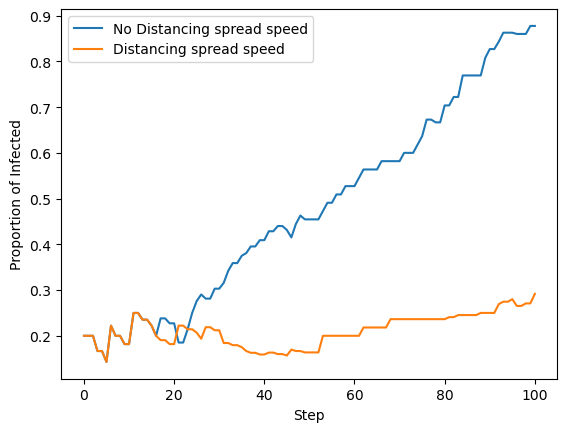

In [6]:
import matplotlib.pyplot as plt
from get_group_fracs import get_group_fracs
import numpy as np

# File names for the two simulations
file_name1 = "postvis_supermarket_no_soc_dist.traj"
file_name2 = "postvis_supermarket_soc_dist.traj"


group_fracs1, sim_times1 = get_group_fracs(file_name1)
group_fracs2, sim_times2 = get_group_fracs(file_name2)

# Filter out non-integer simulation times
sim_times1 = [x[0] for x in enumerate(sim_times1) if int(x[1]) == x[1]]
sim_times2 = [x[0] for x in enumerate(sim_times2) if int(x[1]) == x[1]]

# Print the mean infected proportions for each simulation
print("Mean Infected Proportion (No Distancing):", np.mean(group_fracs1[:, 0]))
print("Mean Infected Proportion (With Distancing):", np.mean(group_fracs2[:, 0]))

# Calculate the rolling average of infected proportions over a window of time (backp)
backp = 1
group_fracs12 = np.zeros(group_fracs1.shape[0])
group_fracs22 = np.zeros(group_fracs2.shape[0])

# Calculate the rolling average for the first simulation
for x in range(backp, group_fracs1.shape[0]):
    group_fracs12[x] = np.sum(group_fracs1[x - backp:x, 0]) / backp

# Calculate the rolling average for the second simulation
for x in range(backp, group_fracs2.shape[0]):
    group_fracs22[x] = np.sum(group_fracs2[x - backp:x, 0]) / backp


group_fracs12 = group_fracs12[backp:]
group_fracs22 = group_fracs22[backp:]

# Plot the rolling average of infected proportions for both simulations
plt.plot(group_fracs12, label="No Distancing spread speed")
plt.plot(group_fracs22, label="Distancing spread speed")
plt.xlabel("Step")
plt.ylabel("Proportion of Infected")
plt.legend()
plt.show()


Plot the TUM Main campus experiment (need of .traj files in project/output)

In [2]:
import matplotlib.pyplot as plt
from get_group_fracs import get_group_fracs
import numpy as np
import os

# Set the search directory to the absolute path of "project/output"
search_dir = os.path.abspath("../vadere-project-task45/output")


l = list(os.path.join(search_dir, x) for x in os.listdir(search_dir) if x != 'corrupt')
files = list(filter(lambda x: os.path.isdir(x), l))


files.sort(key=lambda x: os.path.getmtime(x), reverse=True)

# Get the file name for the last output
file_name = os.path.join(files[0], 'postvis.traj')

group_fracs, times = get_group_fracs(file_name)

# Plot the infected, susceptible, and recovered fractions over time
plt.plot(group_fracs[:, 0], label="Infected")
plt.plot(group_fracs[:, 1], label="Susceptible")
plt.plot(group_fracs[:, 2], label="Recovered")


plt.legend()
a = 0.05
b = 0.5
plt.xlabel("Step")
plt.ylabel("Proportion")
plt.savefig(f"a{int(a*1000)};{int(b*1000)}.png")
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/home/alejandrohdez/Projects/exercise-1-MLCMS/Exercise-2/visualization/project/output'